In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the labeled data
df = pd.read_csv("nike_labelled_data.csv")

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the labeled dataset
df = pd.read_csv("nike_labelled_data.csv")

# Drop any rows with negative or missing sale quantity
df = df[df["Sale Quantity"] >= 0].dropna()

# Create new binary label: High_Sale
df["High_Sale"] = (df["Sale Quantity"] > 600).astype(int)

# Prepare features (X) and target (y)
X = df.drop(columns=["High_Sale", "Sale Quantity", "Label", "Title", "Subtitle", "Color", "Color Description", "Badge", "Dominant Color"])
y = df["High_Sale"]

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Helper function to train and plot decision trees
def train_and_plot_tree(criterion, max_depth=None, ax=None, title="Decision Tree"):
    clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
    plt.title(f"Confusion Matrix ({title})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Plot tree
    plt.figure(figsize=(20, 8))
    plot_tree(clf, feature_names=X.columns, class_names=["Low", "High"], filled=True, rounded=True, fontsize=8)
    plt.title(title)
    plt.tight_layout()
    plt.show()

    return clf, acc




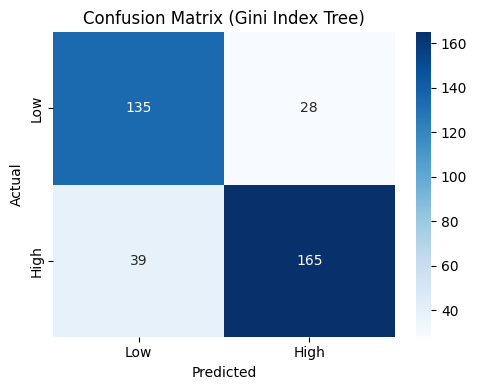

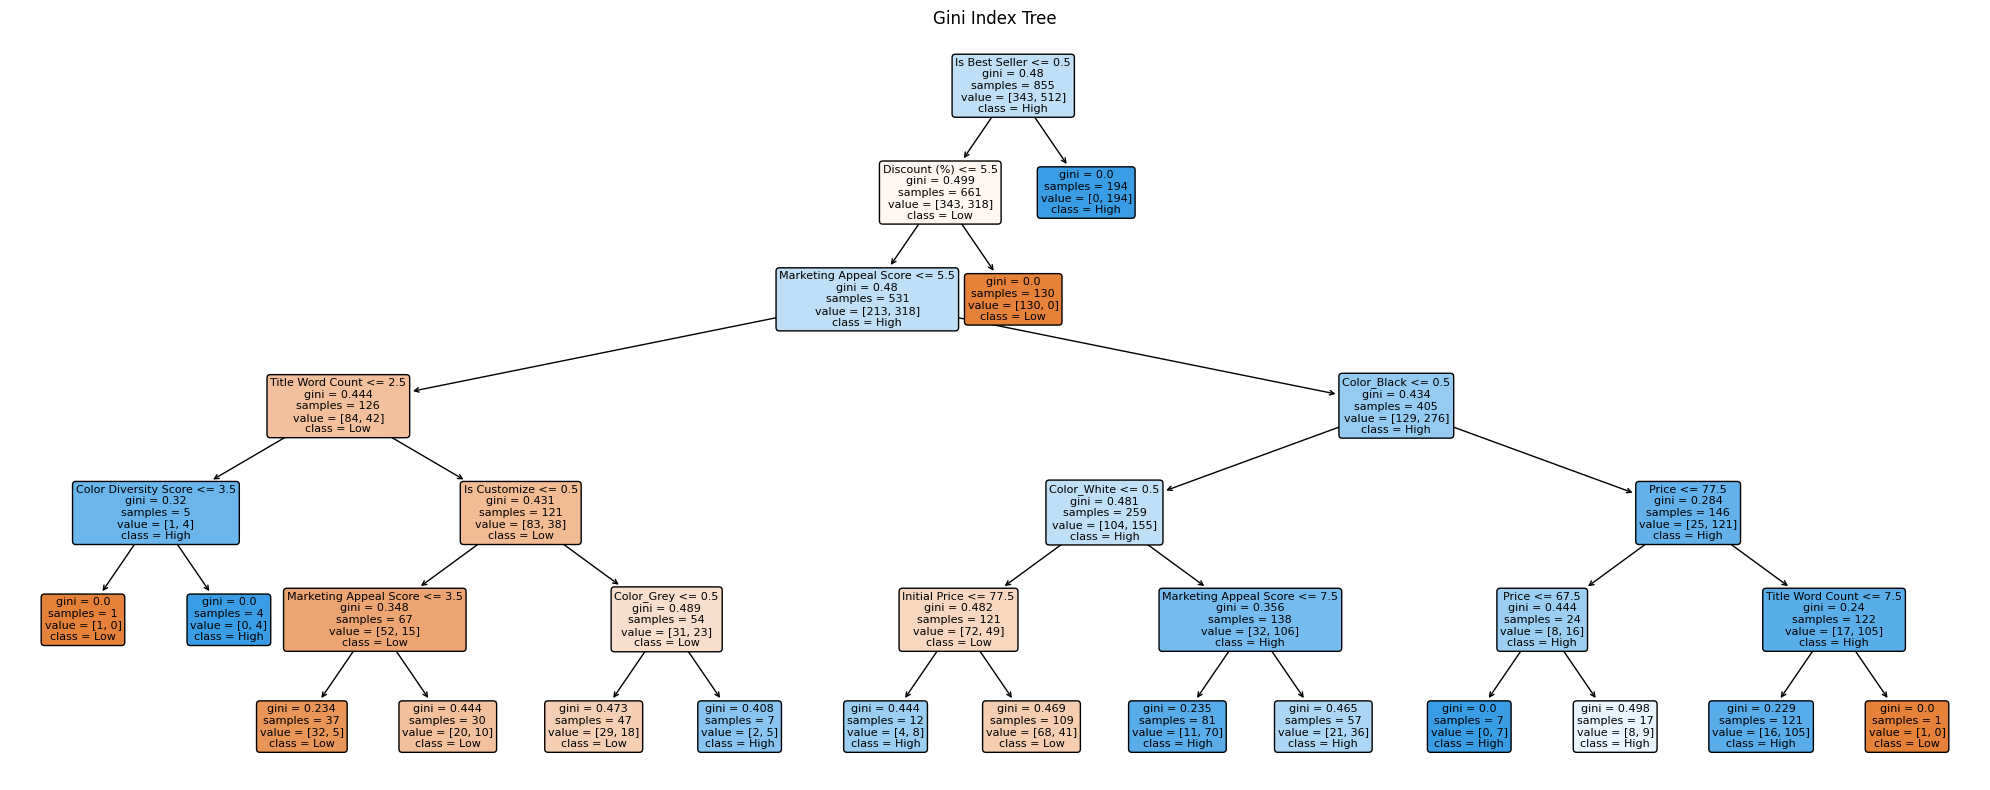

In [8]:
clf_gini, acc_gini = train_and_plot_tree(criterion="gini", title="Gini Index Tree", max_depth=6)

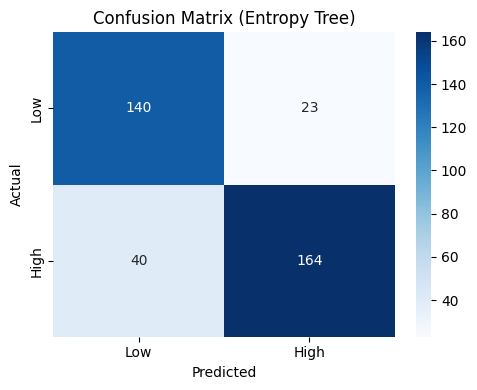

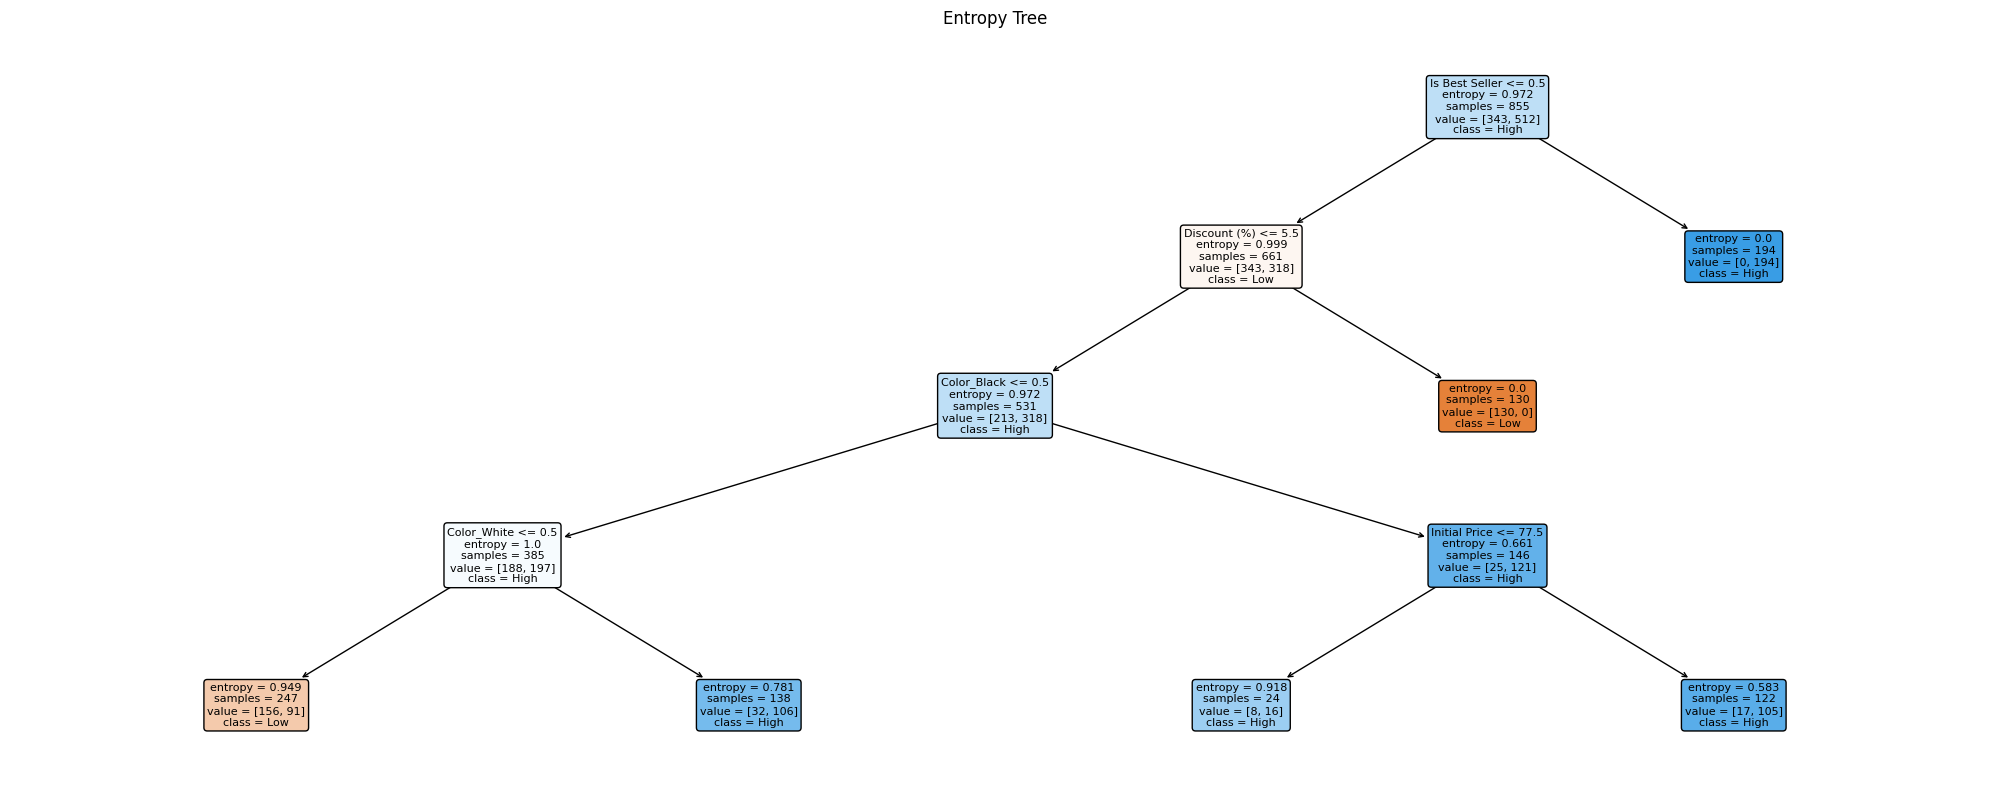

In [10]:
clf_entropy, acc_entropy = train_and_plot_tree(criterion="entropy", title="Entropy Tree", max_depth=4)

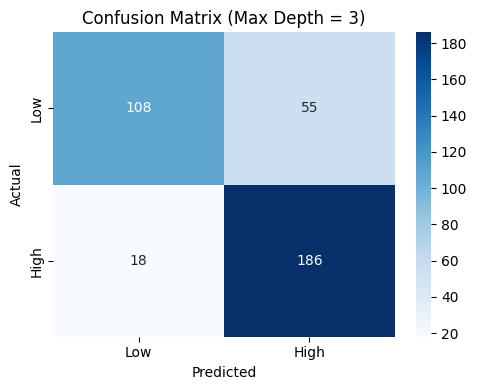

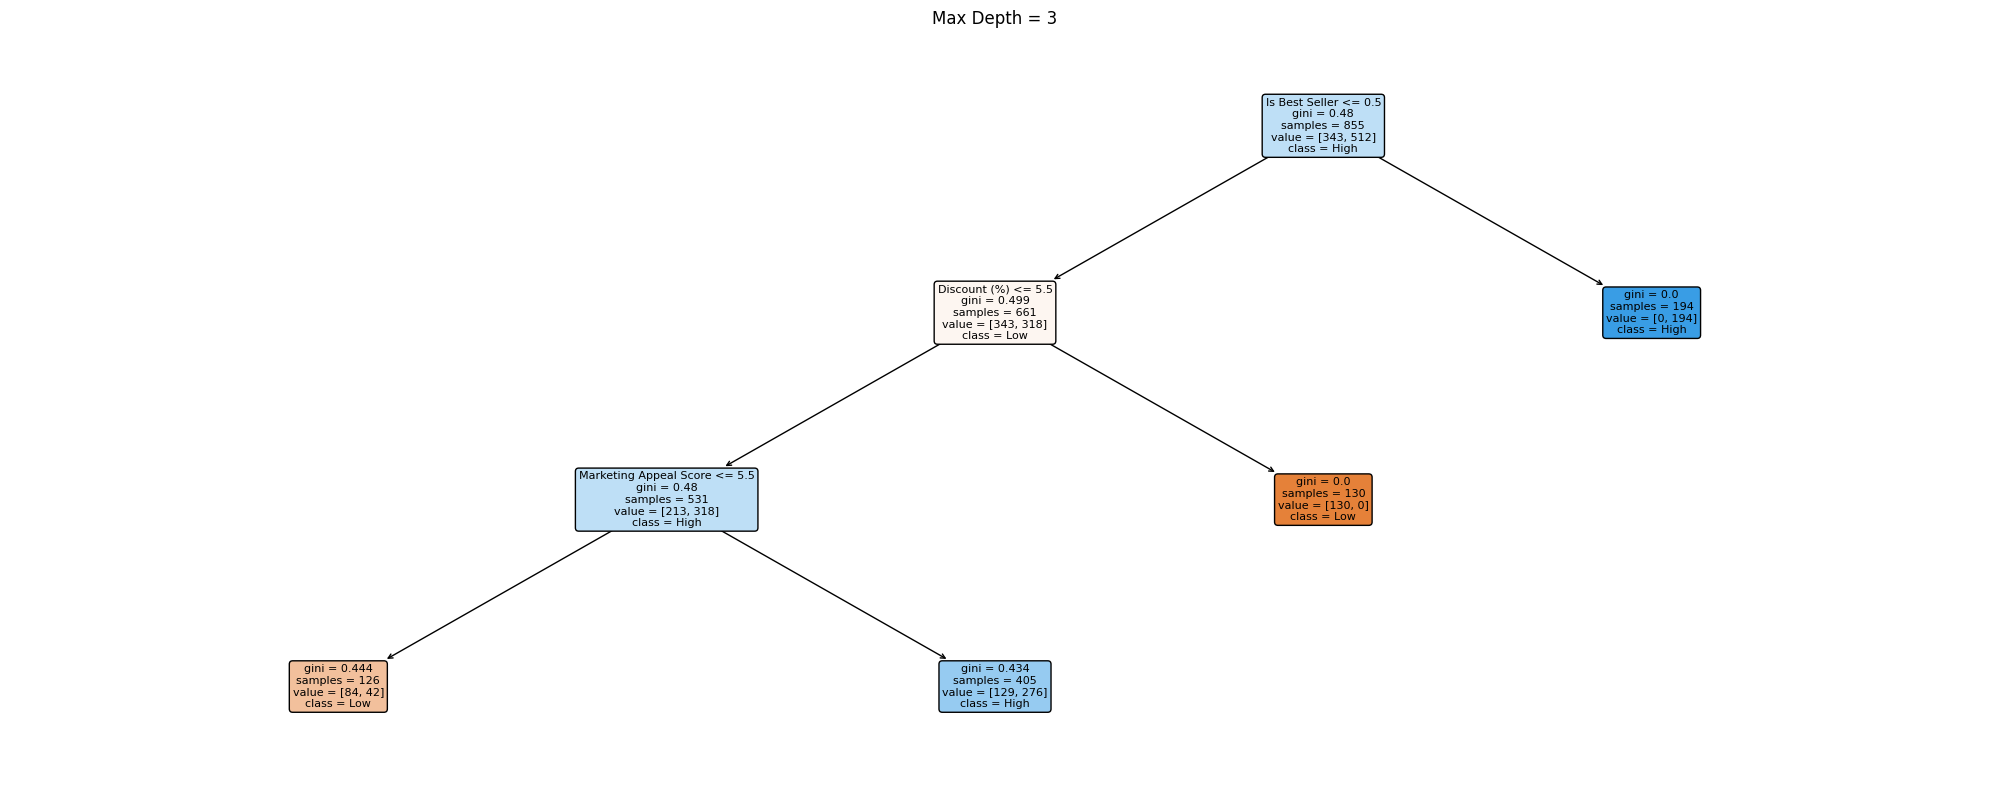

In [11]:
clf_depth3, acc_depth3 = train_and_plot_tree(criterion="gini", max_depth=3, title="Max Depth = 3")

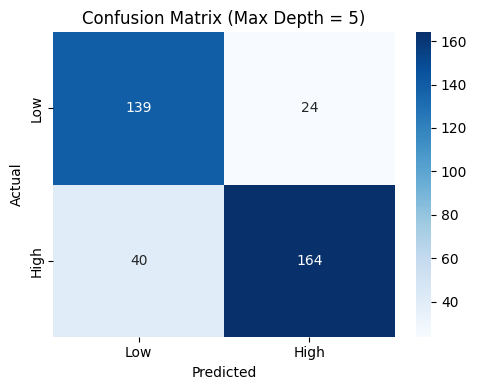

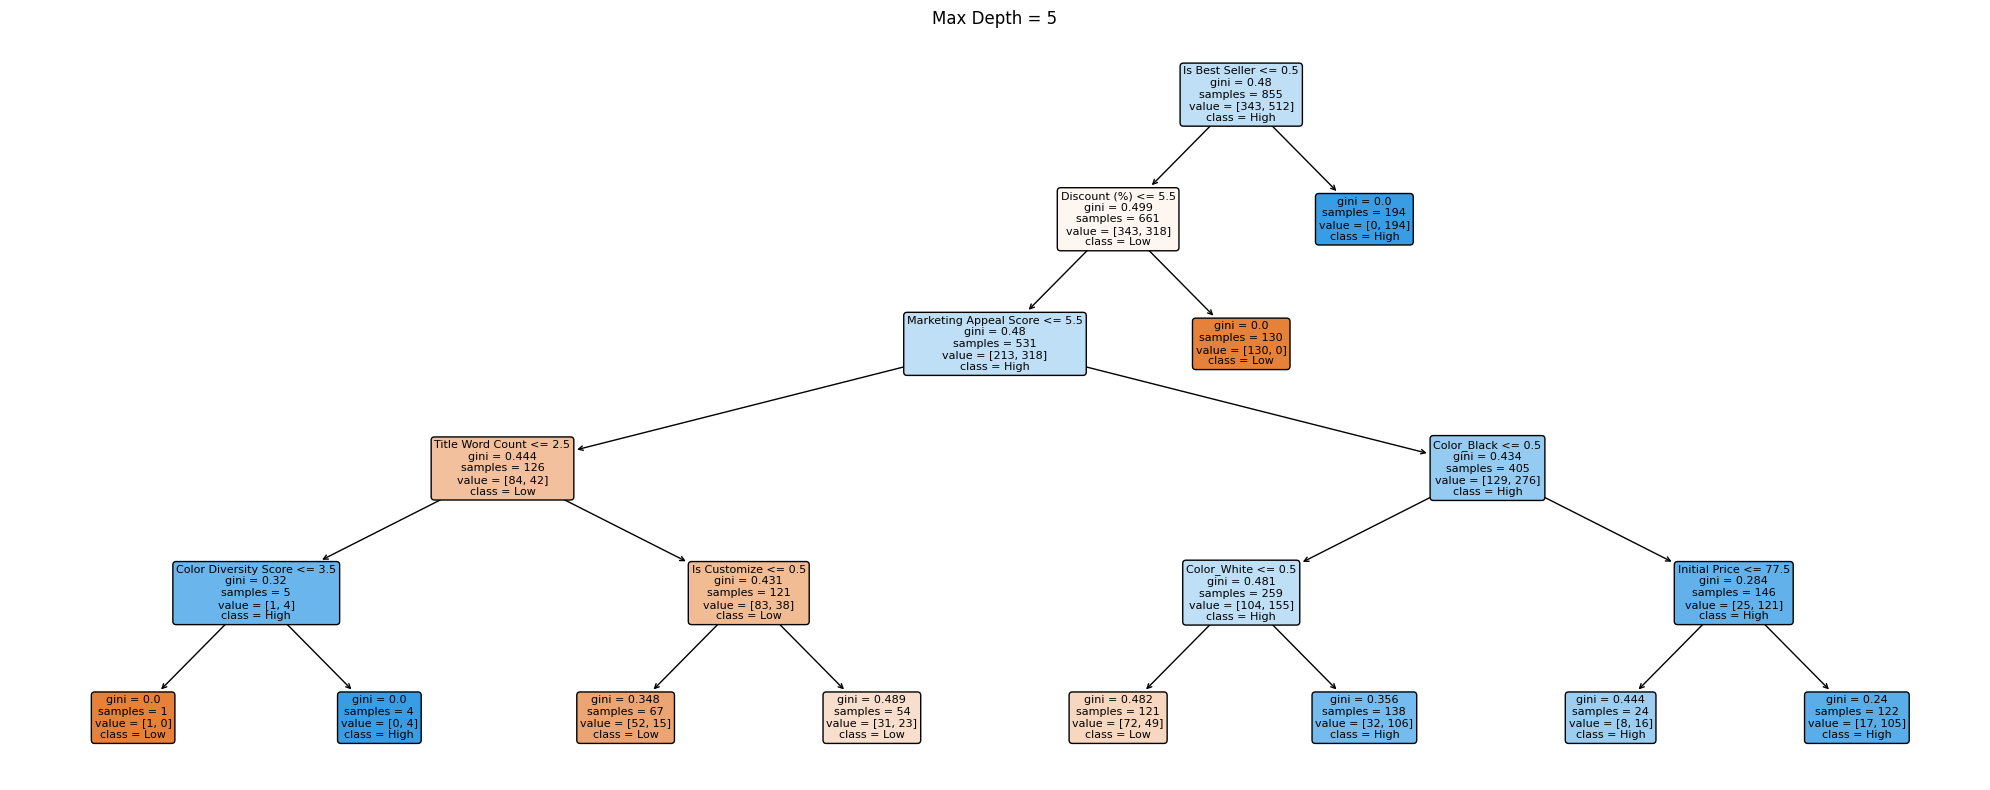

In [12]:
clf_depth5, acc_depth5 = train_and_plot_tree(criterion="gini", max_depth=5, title="Max Depth = 5")